# Sentiment Analysis on Amazon Reviews using Random Forest

### Hanah Chang

## 1. Introduction

In this project, we are going to perform a sentiment analysis on Amazon Review data. Specifically, we are going to predict whether a product review about Amazon Alexa to be classified as negative or positive feedback. 

The dataset is from (www.kaggle.com/sid321axn/amazon-alexa-reviews).  Examples of key variables are:
        - customer reviews: reviews on Amazon Alexa in text format 
        - star ratings: customer’s rating which ranges from 1~5
        - date of review: the date when each review was created 
        - variant: variant of Amazon Alex product, such as Alexa Echo, Echo dots, black, white etc. 
        - feedback: binary value ex) positive or negative  

## 2. Data & Library

The dataset includes 3,150 observations and 5 variables ('rating', 'date', 'variation', 'verified_reviews', 'feedback') 

In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [67]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
print(df.shape)
print(df.head(5))
print(df.keys())

(3150, 5)
   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  
Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


In [68]:
df['verified_reviews'].head(10)

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
5    I received the echo as a gift. I needed anothe...
6    Without having a cellphone, I cannot use many ...
7    I think this is the 5th one I've purchased. I'...
8                                          looks great
9    Love it! I’ve listened to songs I haven’t hear...
Name: verified_reviews, dtype: object

## 3. Explanatory Analysis & Data Cleaning

There are 257 negative vs. 2893 positive feedbacks in our dataset

In [69]:
df.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

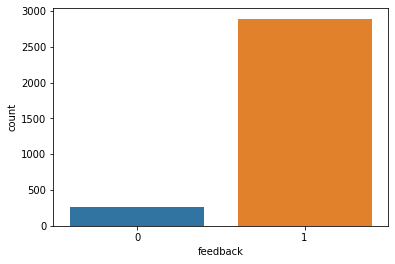

In [70]:
sns.countplot(df['feedback'], label = "Count") 

Consumer Ratings ranges from 1 to 5, just like feedback variable, positive ratings (4, 5) are majority.

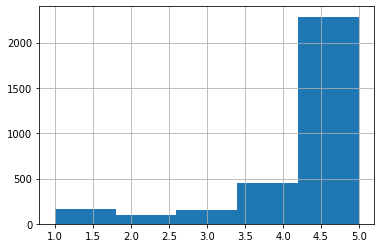

In [71]:
df['rating'].hist(bins = 5)

We found 16 variations, and barcharts below letting us to see that there is no big difference in ratings in terms of variations. Nor the feedback varies based on variations. 

In [72]:
df.variation.unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

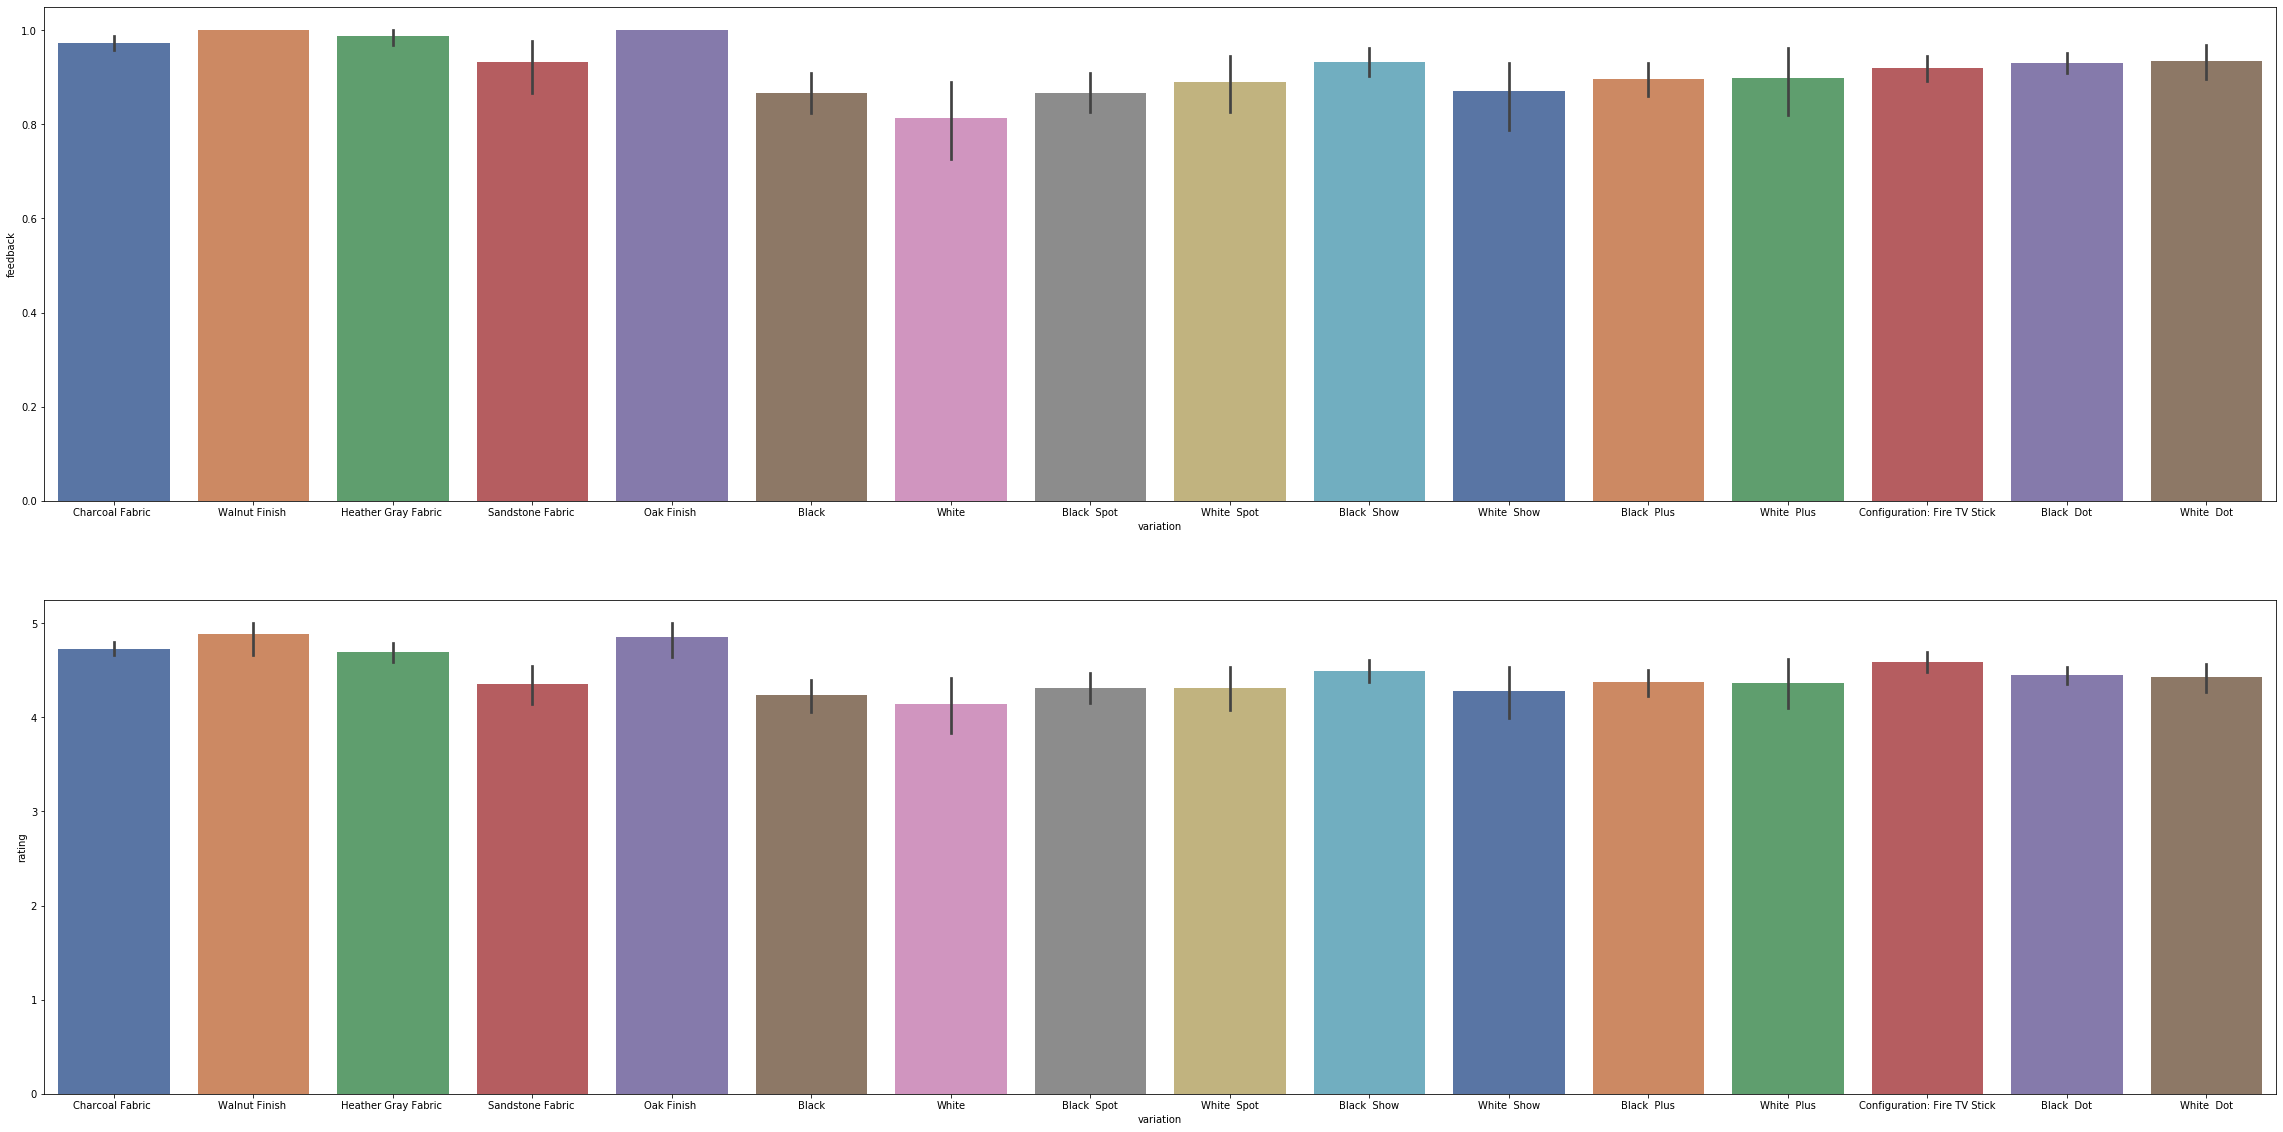

In [73]:
plt.figure(figsize = (40,20))
plt.subplot(2,1,1)
sns.barplot(x = 'variation', y='feedback', data=df, palette = 'deep')

plt.subplot(2,1,2)
sns.barplot(x = 'variation', y='rating', data=df, palette = 'deep')

Our target variable is 'feedback' column, so we do not need 'rating' column which is redundant. Also, date information is less likely to give us additional information for sentiment analysis. So we are going to drop date variable as well. Lastly, we saw from above chart that neither feedback nor rating varies by product variation, so we are going to drop 'variation' as well.

In [74]:
df = df.drop(['date', 'rating','variation'],axis=1)
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


we are going to add length of column 'review' hypothesizing that bad review might be longer than positive ones. 

In [75]:
df['length'] = df.verified_reviews.apply(len)
df.head()

,verified_reviews,feedback,length
0,Love my Echo!,1,13
1,Loved it!,1,9
2,"Sometimes while playing a game, you can answer...",1,195
3,I have had a lot of fun with this thing. My 4 ...,1,172
4,Music,1,5


In order to feed 
create dummies , translate into numbers /one hot encoding. avoid dummies trap, we drop_first = True 
we dont want two columns that are apposite to each other 
to avoid multicollinearity 
lets check withount drop_first <> True 

Now let's transform reviews column into code in order to feed them in our classifier. With CountVectorizer, we are counting how many elements (ex - words) are included in each review. 3,150 reviews turned into 3,150 rows/4,044 columns. Every single word that was contained within 'review' column now become columns.

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
review_vectorized = vectorizer.fit_transform(df['verified_reviews'])

In [77]:
review_vectorized.shape

(3150, 4044)

every single word that has been contained wihin our reviews became columns 

In [93]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

Now, we need to transform above object into 0/1 encoding to feed our algorithm, and merge with our data(df)

In [79]:
reviews = pd.DataFrame(review_vectorized.toarray())
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df.drop(['verified_reviews'], axis=1, inplace=True)
df = pd.concat([df, reviews], axis=1)
df.head(5)

,feedback,length,0,1,2,3,4,5,6,7,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,195,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,172,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Random Forest - Training

In [81]:
y = df['feedback']

In [82]:
X = df.drop(['feedback'],axis=1)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=5)

In [84]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2205, 4045)
X_test (945, 4045)
y_train (2205,)
y_test (945,)


By setting n_estimators = 100 for RandomForestClassifier, we are training 100 trees with 100 random training data subsets.

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Now let's make predictions on our random forest classifier object with our training data. From the result, we can see that only 14 points are misclassified. The f1 score is 99%. 

In [86]:
y_predict_train = randomforest_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)

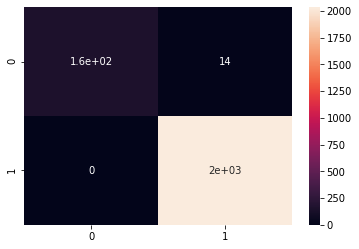

In [87]:
sns.heatmap(cm, annot=True)

In [88]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       171
           1       0.99      1.00      1.00      2034

    accuracy                           0.99      2205
   macro avg       1.00      0.96      0.98      2205
weighted avg       0.99      0.99      0.99      2205



## 5. Random Forest - Evaluating 

When we apply our classifier into testing data, the result is f1-score 90%. We correctly classified 874 cases and misclassified 71 cases.

In [89]:
y_predict_test = randomforest_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

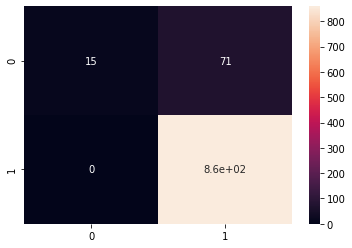

In [90]:
sns.heatmap(cm, annot=True)

In [91]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.17      0.30        86
           1       0.92      1.00      0.96       859

    accuracy                           0.92       945
   macro avg       0.96      0.59      0.63       945
weighted avg       0.93      0.92      0.90       945

